# The way to b3-r7-r4nd7

This notebook is part of a coding challenge sponsored by get-in-IT and Bertrandt. The task is as follows: 

"Dein Ziel ist der Planet b3-r7-r4nd7. Es gilt den schnellsten Weg von dem Knotenpunkt "Erde" aus zu finden. Dabei kannst Du nur von Himmelskörper zu Himmelskörper reisen. Alle Wegstrecken und Planeten findest Du in dem JSON-File. Dabei kannst Du Dich von Graph.nodes[Graph.edges[i].source] nach Graph.nodes[Graph.edges[i].target] und umgekehrt bewegen (ungerichteter Graph). Die Graph.edges[i].cost geben die Entfernung zwischen den beiden Planeten an."

The target is to reach planet b3-r7-r4nd7. You have to find the fastest way from planet earth. We can jump from planet to planet. All paths and planets are located in the json file. We can move from Graph.nodes[Graph.edges[i].source] to Graph.nodes[Graph.edges[i].target] and vice versa (undirected ghraph).  Graph.edges[i].cost are showing the cost between both planets.

https://www.get-in-it.de/coding-challenge?utm_source=magazin&utm_medium=advertorial&utm_campaign=coding-challenge

Lets switch to the commando bridge of the space explorer space carrier to see how we can reach b3-r7-r4nd7.

On the bridge of the space explorer ship, the captain and his first officer are planning their next journey to planet b3-r7-r4nd7

In [190]:
from collections import defaultdict
from pyvis import network as net
from pyvis.network import Network
from random import choices
from string import ascii_lowercase
import json
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

At first the packages need to be loaded into the system.

## Data Preperation

In [235]:
with open('Data/generatedGraph.json') as f:
    d = json.load(f)
    print(d)

{'nodes': [{'label': 'node_0'}, {'label': 'node_1'}, {'label': 'node_2'}, {'label': 'node_3'}, {'label': 'node_4'}, {'label': 'node_5'}, {'label': 'node_6'}, {'label': 'node_7'}, {'label': 'node_8'}, {'label': 'node_9'}, {'label': 'node_10'}, {'label': 'node_11'}, {'label': 'node_12'}, {'label': 'node_13'}, {'label': 'node_14'}, {'label': 'node_15'}, {'label': 'node_16'}, {'label': 'node_17'}, {'label': 'Erde'}, {'label': 'node_19'}, {'label': 'node_20'}, {'label': 'node_21'}, {'label': 'node_22'}, {'label': 'node_23'}, {'label': 'node_24'}, {'label': 'node_25'}, {'label': 'node_26'}, {'label': 'node_27'}, {'label': 'node_28'}, {'label': 'node_29'}, {'label': 'node_30'}, {'label': 'node_31'}, {'label': 'node_32'}, {'label': 'node_33'}, {'label': 'node_34'}, {'label': 'node_35'}, {'label': 'node_36'}, {'label': 'node_37'}, {'label': 'node_38'}, {'label': 'node_39'}, {'label': 'node_40'}, {'label': 'node_41'}, {'label': 'node_42'}, {'label': 'node_43'}, {'label': 'node_44'}, {'label': 'n

From mission control they received a JSON file with the coordinates to the target. These coordinates need to be loaded into the system. The first officer is asking the computer the transform the file into the readable pandas table format.

In [236]:
data = pd.DataFrame.from_dict(d, orient='index')
data

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
nodes,{'label': 'node_0'},{'label': 'node_1'},{'label': 'node_2'},{'label': 'node_3'},{'label': 'node_4'},{'label': 'node_5'},{'label': 'node_6'},{'label': 'node_7'},{'label': 'node_8'},{'label': 'node_9'},...,None,None,None,None,None,None,None,None,None,None
edges,"{'source': 343, 'target': 801, 'cost': 0.81172...","{'source': 102, 'target': 474, 'cost': 0.54895...","{'source': 636, 'target': 693, 'cost': 0.86165...","{'source': 55, 'target': 937, 'cost': 0.387693...","{'source': 15, 'target': 338, 'cost': 0.698072...","{'source': 163, 'target': 956, 'cost': 0.38757...","{'source': 667, 'target': 767, 'cost': 0.20488...","{'source': 353, 'target': 811, 'cost': 0.96116...","{'source': 93, 'target': 263, 'cost': 0.054968...","{'source': 52, 'target': 339, 'cost': 0.289882...",...,"{'source': 740, 'target': 785, 'cost': 0.11365...","{'source': 232, 'target': 656, 'cost': 0.84728...","{'source': 695, 'target': 941, 'cost': 0.70025...","{'source': 52, 'target': 147, 'cost': 0.124242...","{'source': 837, 'target': 910, 'cost': 0.18690...","{'source': 261, 'target': 823, 'cost': 0.24025...","{'source': 101, 'target': 588, 'cost': 0.09582...","{'source': 163, 'target': 567, 'cost': 0.14692...","{'source': 622, 'target': 631, 'cost': 0.31548...","{'source': 139, 'target': 994, 'cost': 0.94292..."


In [237]:
# return the transpose 
result = data.transpose() 
  
# Print the result 
result.head()

,nodes,edges
0,{'label': 'node_0'},"{'source': 343, 'target': 801, 'cost': 0.81172..."
1,{'label': 'node_1'},"{'source': 102, 'target': 474, 'cost': 0.54895..."
2,{'label': 'node_2'},"{'source': 636, 'target': 693, 'cost': 0.86165..."
3,{'label': 'node_3'},"{'source': 55, 'target': 937, 'cost': 0.387693..."
4,{'label': 'node_4'},"{'source': 15, 'target': 338, 'cost': 0.698072..."


This looks already better, lets continue.....

In [238]:
#We are isolating the edges list
edges = result.iloc[:,1]
edges.head()

0    {'source': 343, 'target': 801, 'cost': 0.81172...
1    {'source': 102, 'target': 474, 'cost': 0.54895...
2    {'source': 636, 'target': 693, 'cost': 0.86165...
3    {'source': 55, 'target': 937, 'cost': 0.387693...
4    {'source': 15, 'target': 338, 'cost': 0.698072...
Name: edges, dtype: object

In [239]:
#And the nodes list
nodes = result.iloc[:,0]
nodes.dropna(inplace=True)
nodes.head()

0    {'label': 'node_0'}
1    {'label': 'node_1'}
2    {'label': 'node_2'}
3    {'label': 'node_3'}
4    {'label': 'node_4'}
Name: nodes, dtype: object

In [240]:
nodes = pd.DataFrame(nodes.values.tolist(), index=nodes.index)
nodes.head()

,label
0,node_0
1,node_1
2,node_2
3,node_3
4,node_4


In [241]:
nodes[nodes["label"].astype(str).apply(lambda x: 'Erde' in x)]

,label
18,Erde


The computer has found our starting point which is located at node 18

In [242]:
nodes[nodes["label"].astype(str).apply(lambda x: 'b3-r7-r4nd7' in x)]

,label
246,b3-r7-r4nd7


We need to go to b3-r7-r4nd7 which is located at node 246

In [243]:
# The edges list will be transformed....
edges = pd.DataFrame(edges.values.tolist(), index=edges.index)
edges["source"] = "N_" + edges["source"].astype(str)
edges["target"] = "N_" + edges["target"].astype(str)
cols = list(edges.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('cost'))
edges = edges[cols+['cost']] #Create new dataframe with columns in the order you want
edges.to_csv('Data/edges.CSV',sep=',')
edges.head()

,source,target,cost
0,N_343,N_801,0.811722
1,N_102,N_474,0.548957
2,N_636,N_693,0.861659
3,N_55,N_937,0.387693
4,N_15,N_338,0.698073


This will be the format in which we will use the coordinates to find our way and analyze.

In [244]:
# We are creating a network to explore the galaxy...
net = Network(height="750px", width="100%", bgcolor="white", font_color="black")

# set the physics layout of the network
net.barnes_hut()

sources = edges['source']
targets = edges['target']
weights = edges['cost']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    net.add_edge(src, dst, value=w)

neighbor_map = net.get_adj_list()

net.show_buttons(filter_=['physics'])
net.show("network.html")

This is way to complicated! It will be a challenge to navigate through all these planets.

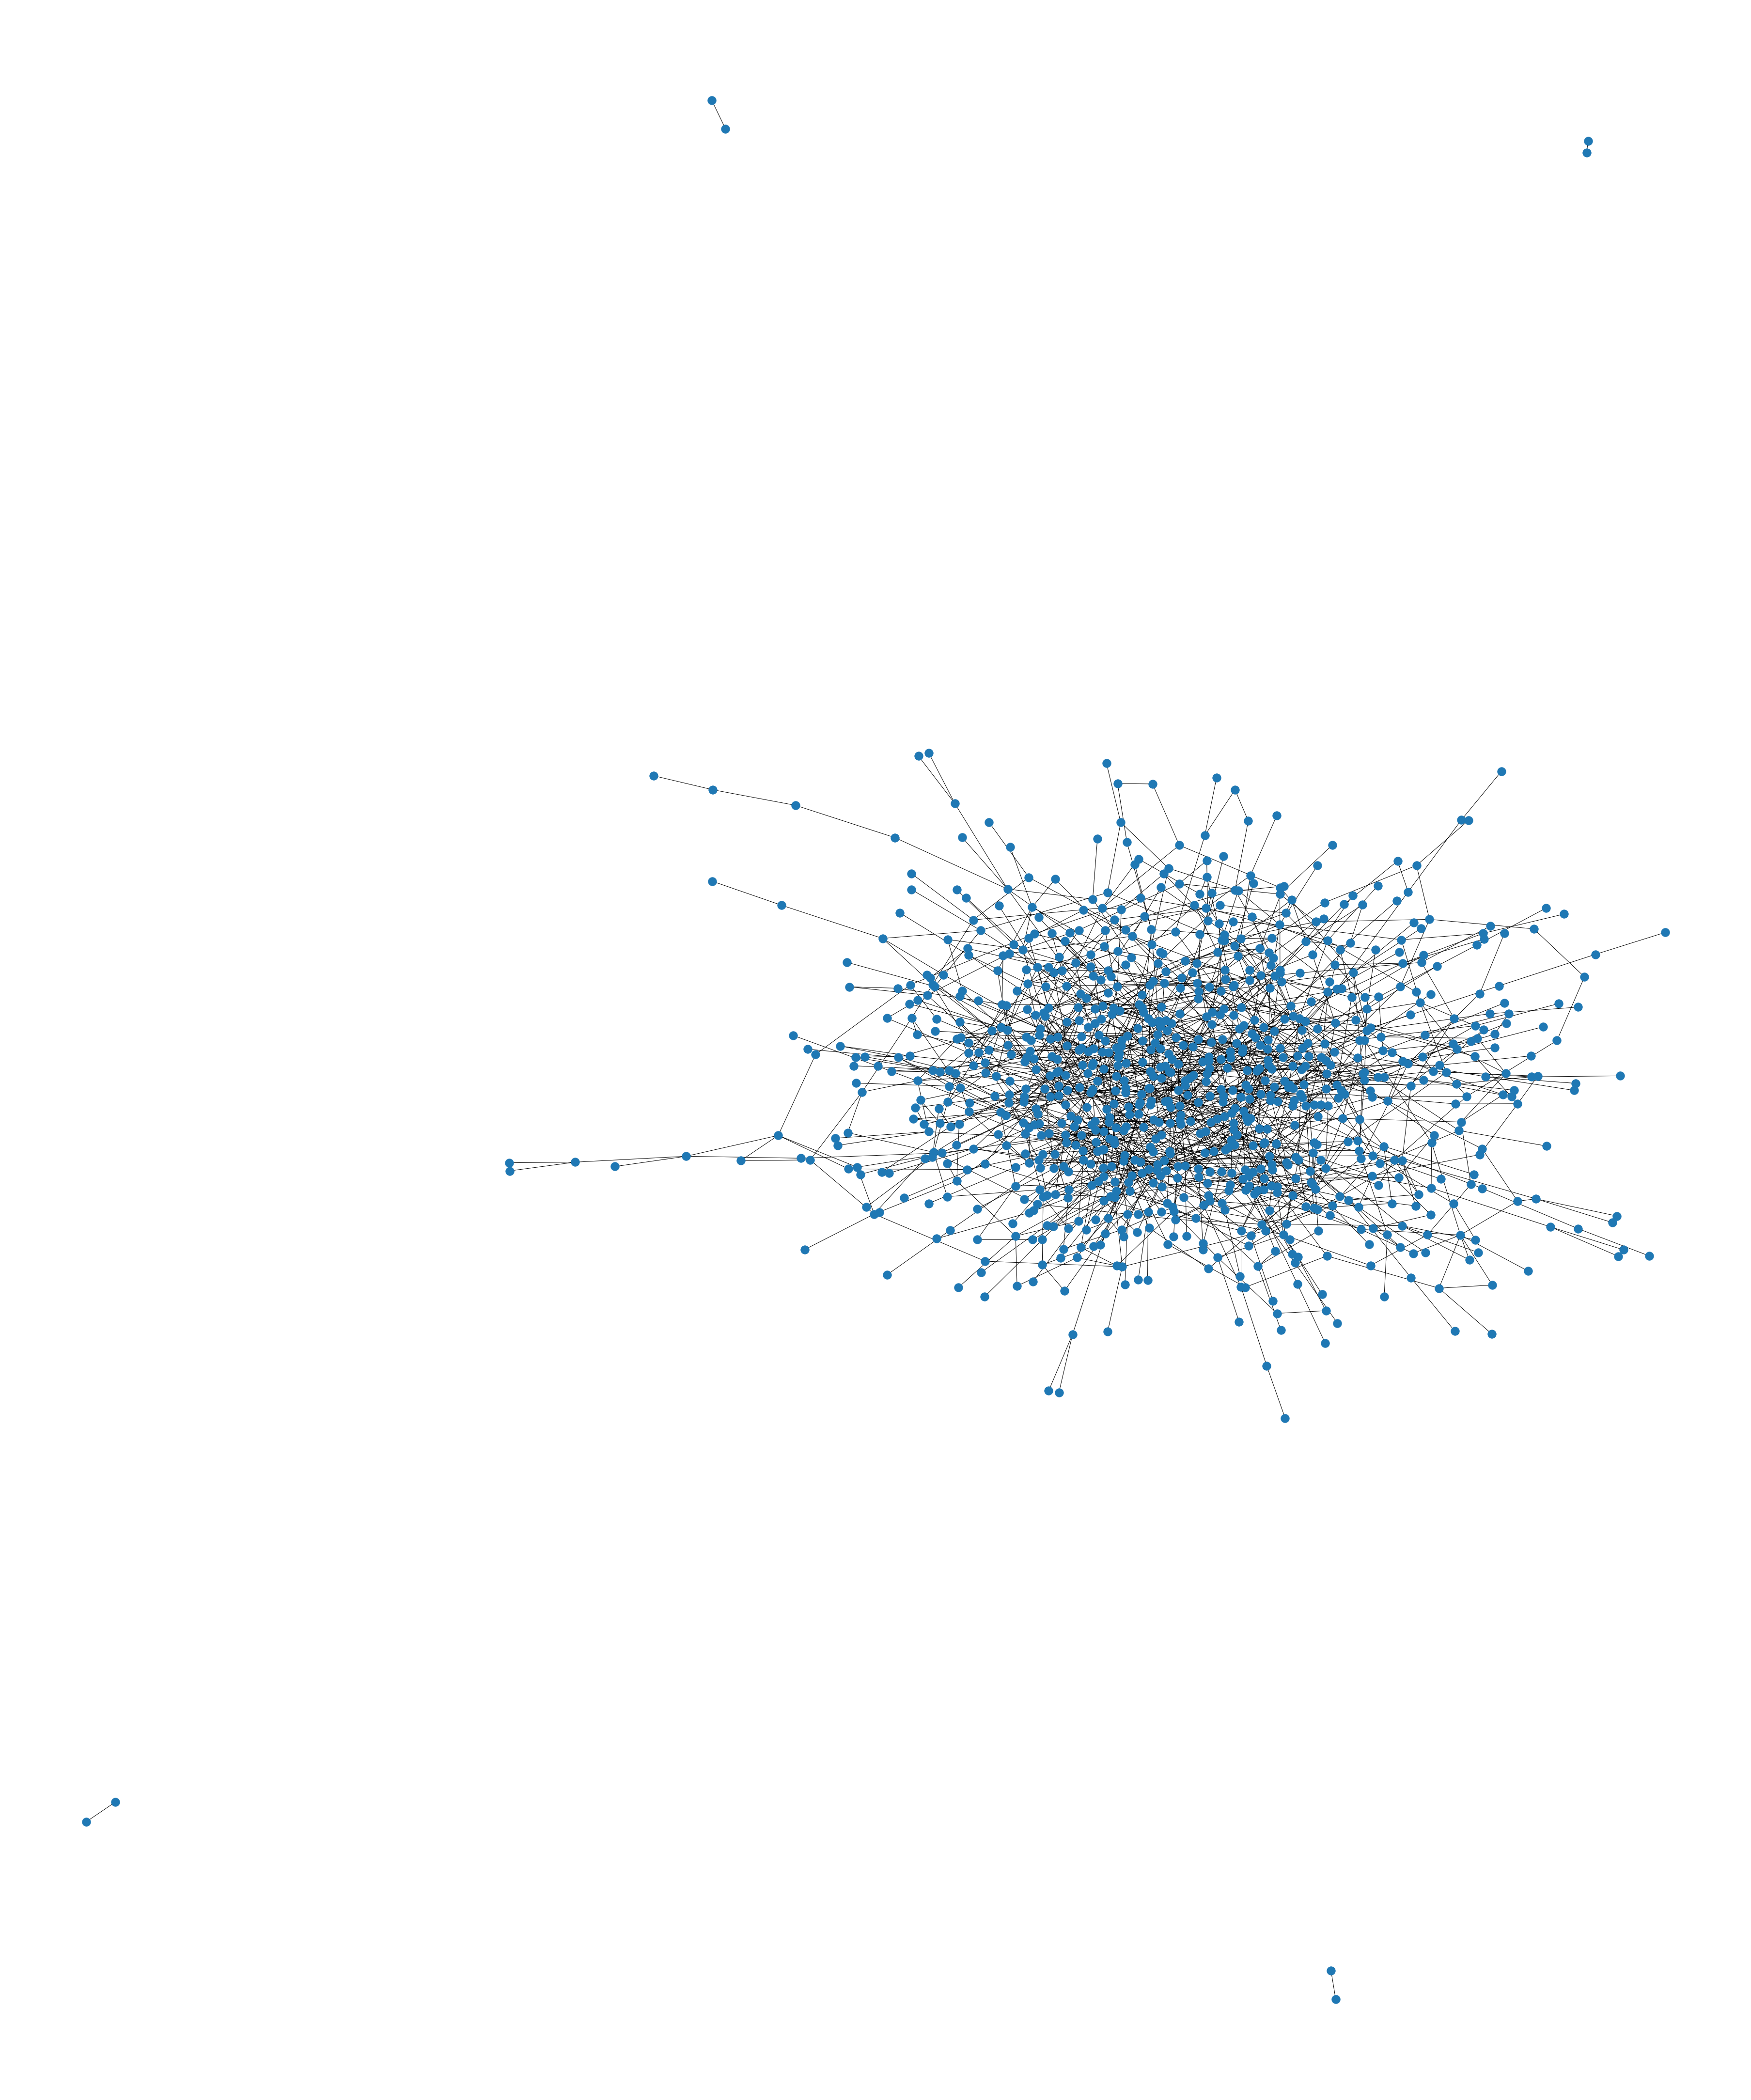

In [245]:
plt.figure(figsize=(50,60))
g = nx.from_pandas_edgelist(edges, source='source', target='target', edge_attr='cost')
nx.draw(g, width=1, edge_color="black")
plt.savefig("Data/network.png") # save as png
nx.write_gexf(g, "Data/network.gexf")

This looks quite complicated, lets startup the navigation system.

## Pathfinding

For finding the shortest path, we will be using the Dijkstra algorithm.

"Dijkstra’s algorithm, published in 1959 and named after its creator Dutch computer scientist Edsger Dijkstra, can be applied on a weighted graph. The graph can either be directed or undirected. One stipulation to using the algorithm is that the graph needs to have a nonnegative weight on every edge."
https://brilliant.org/wiki/dijkstras-short-path-finder/

Steps in the algorithm:

We step through Dijkstra's algorithm on the graph used in the algorithm above:

1. Initialize distances according to the algorithm. 

![caption](Step1.png)

2. Pick first node and calculate distances to adjacent nodes. 

![caption](Step2.png)

3. Pick next node with minimal distance; repeat adjacent node distance calculations. 

![caption](Step3.png)

4. Final result of shortest-path tree 

![caption](Step4.png)

Dijkstra's Shortest Path Algorithm. Brilliant.org. Retrieved 11:45, May 23, 2019, from https://brilliant.org/wiki/dijkstras-short-path-finder/

In [246]:
class Graph():
    def __init__(self):
        """
        self.edges is a dict of all possible next nodes
        e.g. {'X': ['A', 'B', 'C', 'E'], ...}
        self.weights has all the weights between two nodes,
        with the two nodes as a tuple as the key
        e.g. {('X', 'A'): 7, ('X', 'B'): 2, ...}
        """
        self.edges = defaultdict(list)
        self.weights = {}
    
    def add_edge(self, from_node, to_node, weight):
        # Note: assumes edges are bi-directional
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight

In [247]:
graph = Graph()

We startup the system and define the graph

In [248]:
edges_matrix = edges.as_matrix()
edges_matrix

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([['N_343', 'N_801', 0.8117216039041273],
       ['N_102', 'N_474', 0.5489571746649449],
       ['N_636', 'N_693', 0.8616592790006117],
       ...,
       ['N_163', 'N_567', 0.1469249455019097],
       ['N_622', 'N_631', 0.31548564142399704],
       ['N_139', 'N_994', 0.9429215999485347]], dtype=object)

In [249]:
for edge in edges_matrix:
    graph.add_edge(*edge)

We put the edges into a matrix.

In [250]:
def dijsktra(graph, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    
    # Work back through destinations in shortest path
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    # Reverse path
    path = path[::-1]
    return path

This is where the calculation happens. It will go through the steps as outlined before. Please note that the nodes can be bi-directional in this case.

In [251]:
way_to_b3_r7_r4nd7 = dijsktra(graph, 'N_18', 'N_246')
way_to_b3_r7_r4nd7

['N_18', 'N_810', 'N_595', 'N_132', 'N_519', 'N_71', 'N_432', 'N_246']

There is our way! Lets have a look if it is the correct one and make some Analysis!

In [252]:
way_to_b3_r7_r4nd7 = pd.DataFrame(way_to_b3_r7_r4nd7,columns=['source'])
way_to_b3_r7_r4nd7['target']= way_to_b3_r7_r4nd7 ['source']
way_to_b3_r7_r4nd7['target'] = way_to_b3_r7_r4nd7['target'].shift(-1)
way_to_b3_r7_r4nd7 = pd.merge(way_to_b3_r7_r4nd7, edges, how='left', on=['source','target'])


way_to_b3_r7_r4nd7 ['source_2'] = way_to_b3_r7_r4nd7['source']
way_to_b3_r7_r4nd7['target_2'] = way_to_b3_r7_r4nd7['target']
edges ['source_2'] = edges['target']
edges['target_2'] = edges['source']
way_to_b3_r7_r4nd7 = pd.merge(way_to_b3_r7_r4nd7, edges, how='left', on=['source_2','target_2'])
way_to_b3_r7_r4nd7.drop(columns =["target_2","source_2","source_y","target_y"], inplace = True)


way_to_b3_r7_r4nd7["combined_cost"] = way_to_b3_r7_r4nd7['cost_x'].combine_first(way_to_b3_r7_r4nd7['cost_y'])
way_to_b3_r7_r4nd7["source_x"] = way_to_b3_r7_r4nd7["source_x"].str.replace("N_18", "Earth")
way_to_b3_r7_r4nd7["target_x"] = way_to_b3_r7_r4nd7["target_x"].str.replace("N_246", "b3-r7-r4nd7")
way_to_b3_r7_r4nd7 = way_to_b3_r7_r4nd7.drop(way_to_b3_r7_r4nd7.index[7])
way_to_b3_r7_r4nd7['source_x'] = "Planet " + way_to_b3_r7_r4nd7['source_x']
way_to_b3_r7_r4nd7['target_x'] = "Planet " + way_to_b3_r7_r4nd7['target_x']
way_to_b3_r7_r4nd7["combined_way"] = way_to_b3_r7_r4nd7['source_x'] + " to " + way_to_b3_r7_r4nd7['target_x']

way_to_b3_r7_r4nd7

,source_x,target_x,cost_x,cost_y,combined_cost,combined_way
0,Planet Earth,Planet N_810,0.040602,NaN,0.040602,Planet Earth to Planet N_810
1,Planet N_810,Planet N_595,NaN,0.162804,0.162804,Planet N_810 to Planet N_595
2,Planet N_595,Planet N_132,NaN,0.633138,0.633138,Planet N_595 to Planet N_132
3,Planet N_132,Planet N_519,0.633362,NaN,0.633362,Planet N_132 to Planet N_519
4,Planet N_519,Planet N_71,NaN,0.762576,0.762576,Planet N_519 to Planet N_71
5,Planet N_71,Planet N_432,0.674216,NaN,0.674216,Planet N_71 to Planet N_432
6,Planet N_432,Planet b3-r7-r4nd7,NaN,0.088990,0.088990,Planet N_432 to Planet b3-r7-r4nd7


Lets put the data in one table.

In [253]:
sum(way_to_b3_r7_r4nd7['combined_cost'])

2.995687895999458

We will be using 3 units of feuel between Earth and b3-r7-r4nd7

In [254]:
way_to_b3_r7_r4nd7.describe()

,cost_x,cost_y,combined_cost
count,3.000000,4.000000,7.000000
mean,0.449393,0.411877,0.427955
std,0.354612,0.335778,0.314153
min,0.040602,0.088990,0.040602
25%,0.336982,0.144350,0.125897
50%,0.633362,0.397971,0.633138
75%,0.653789,0.665498,0.653789
max,0.674216,0.762576,0.762576


In the seven jumps, we will use 0.43 units of feuel units per jump. The lowest amount will be 0.04 (first jump after Earth) and maximum 0.77 (Planet N_519 to Planet N_71)

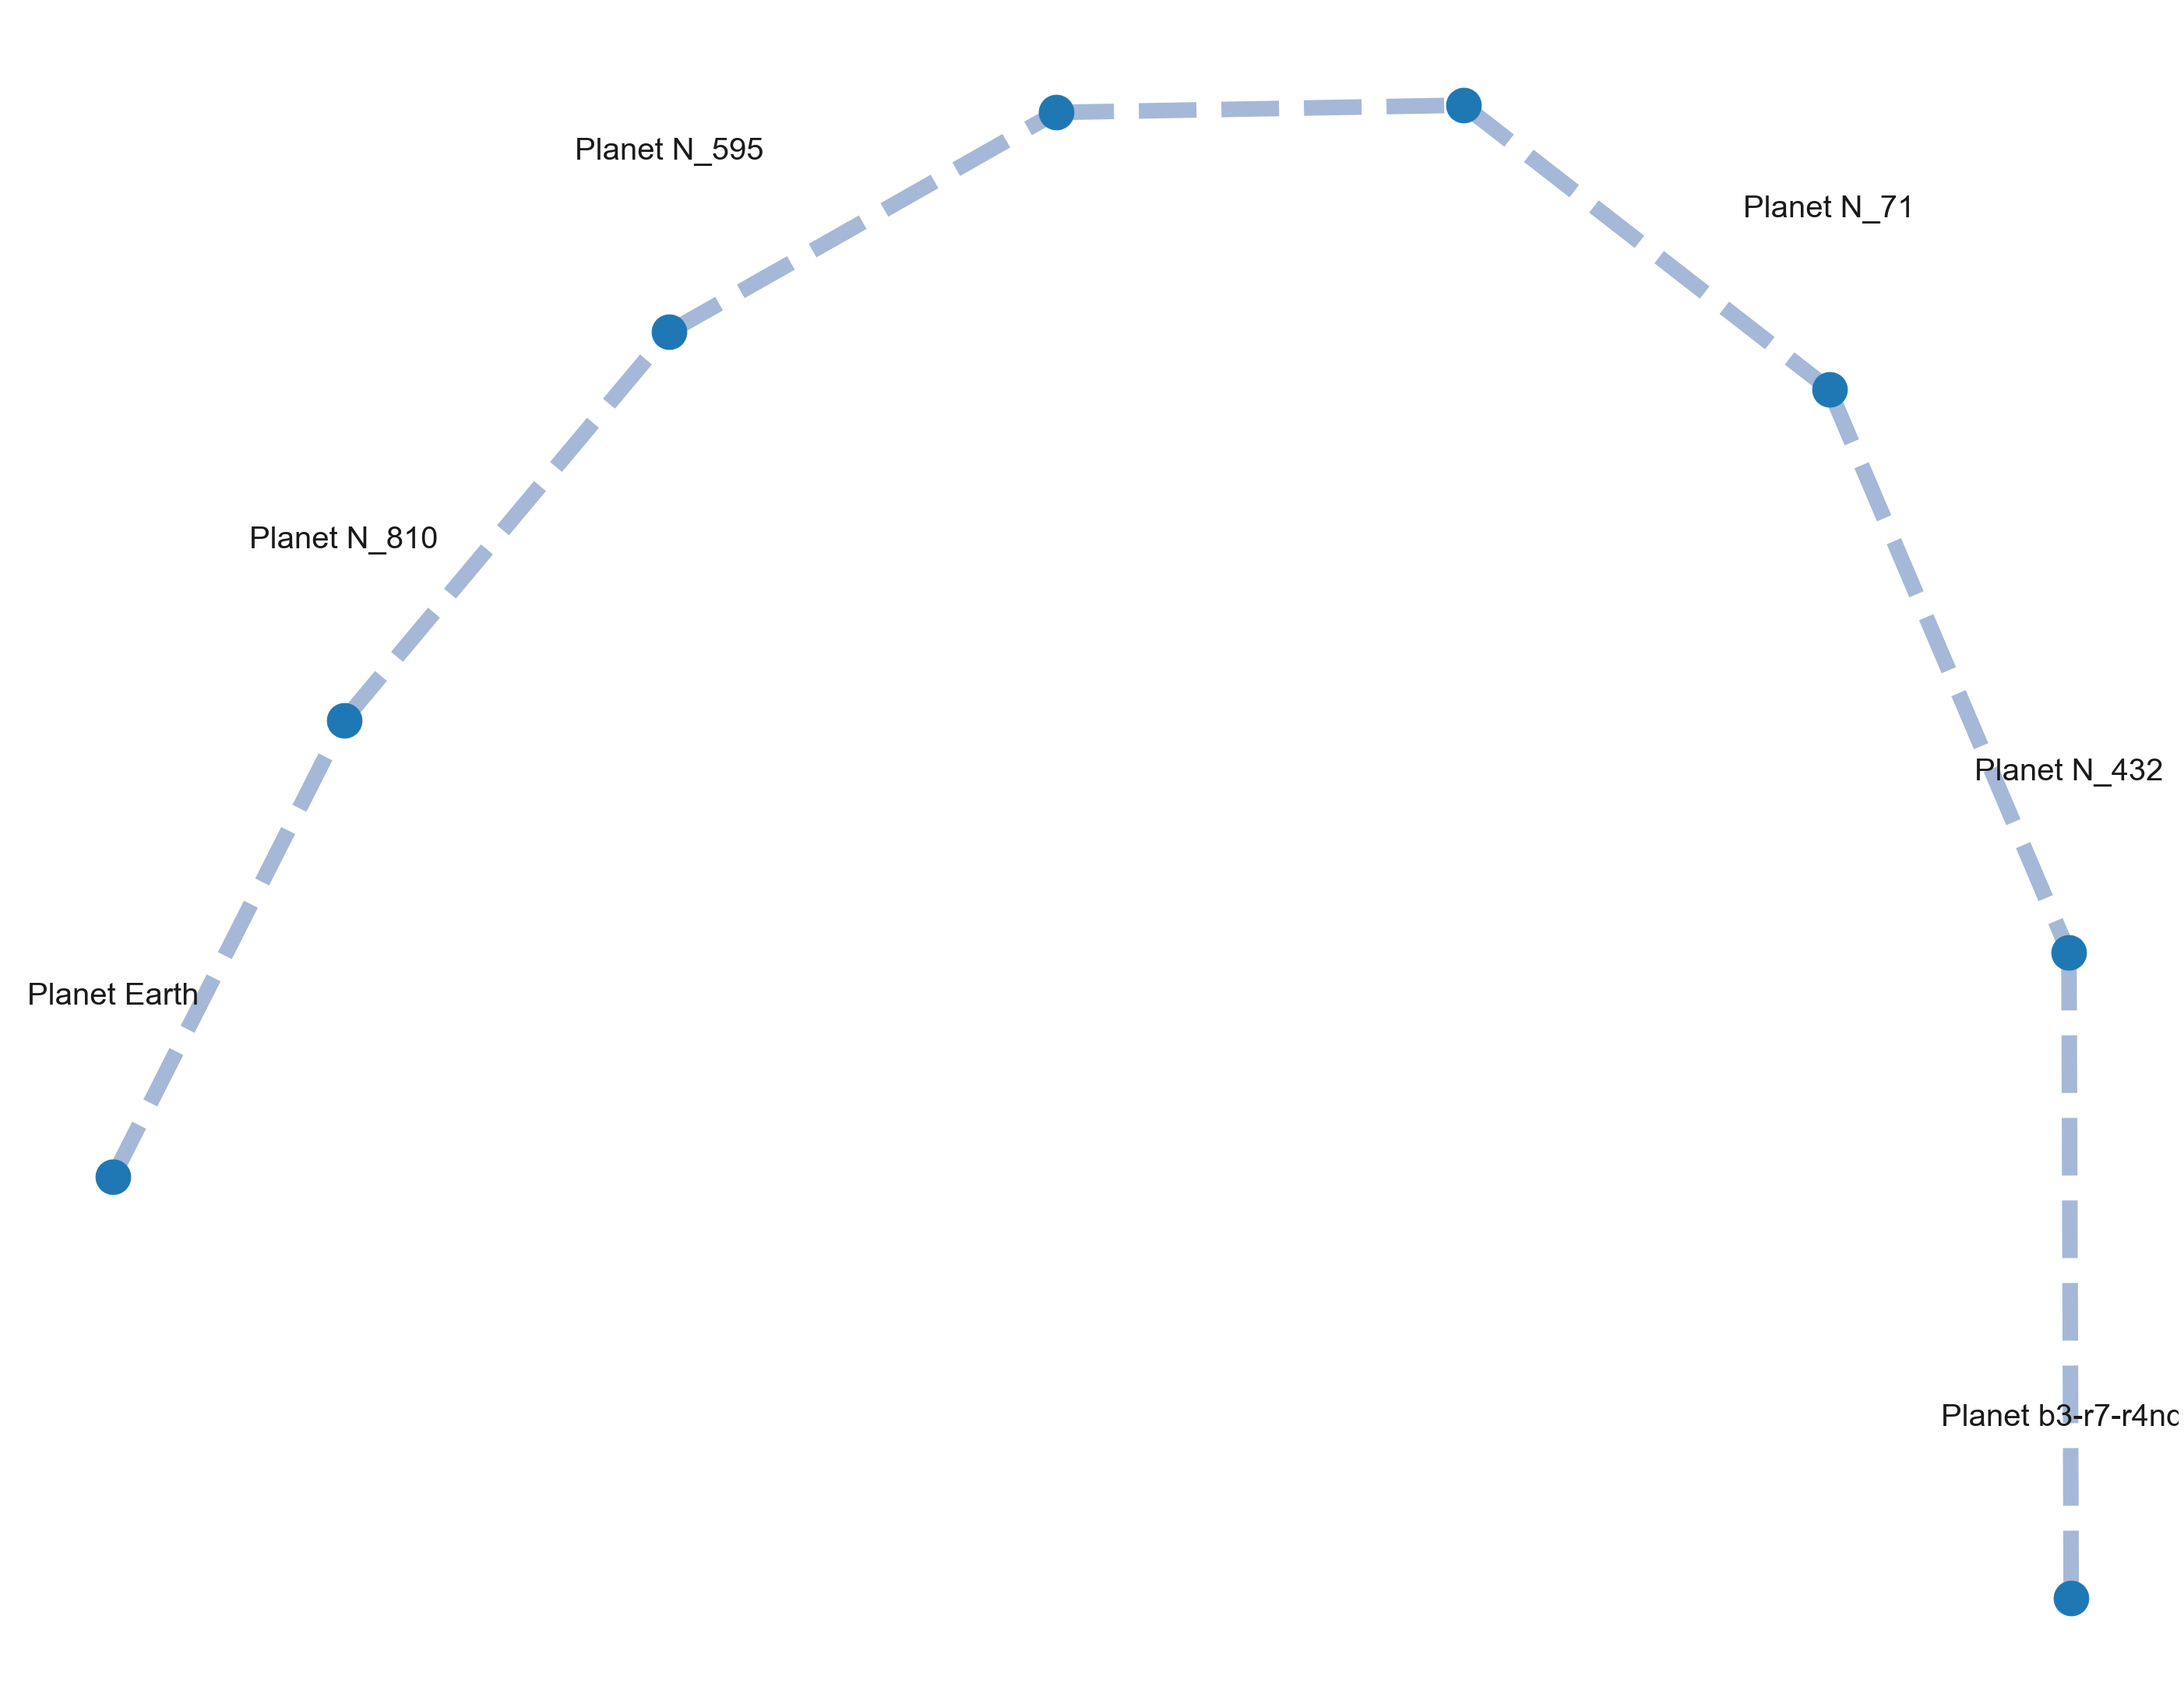

In [259]:
plt.figure(figsize=(50,40))

g = nx.convert_matrix.from_pandas_edgelist(way_to_b3_r7_r4nd7, source='source_x', target='target_x', edge_attr='combined_cost')

pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=2000)

#edges
nx.draw_networkx_edges(g, pos, width=20, alpha=0.5, edge_color='b', style='dashed')
#nx.draw_networkx_edge_labels(g, pos, font_size=30)

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.08)

nx.draw_networkx_labels(g, pos_attrs,font_size=40, font_family='sans-serif')

plt.axis('off')
plt.savefig("Data/weighted_graph.png") # save as png
plt.show()

The graph is shown above but let us have a look on the cost between the jumps.

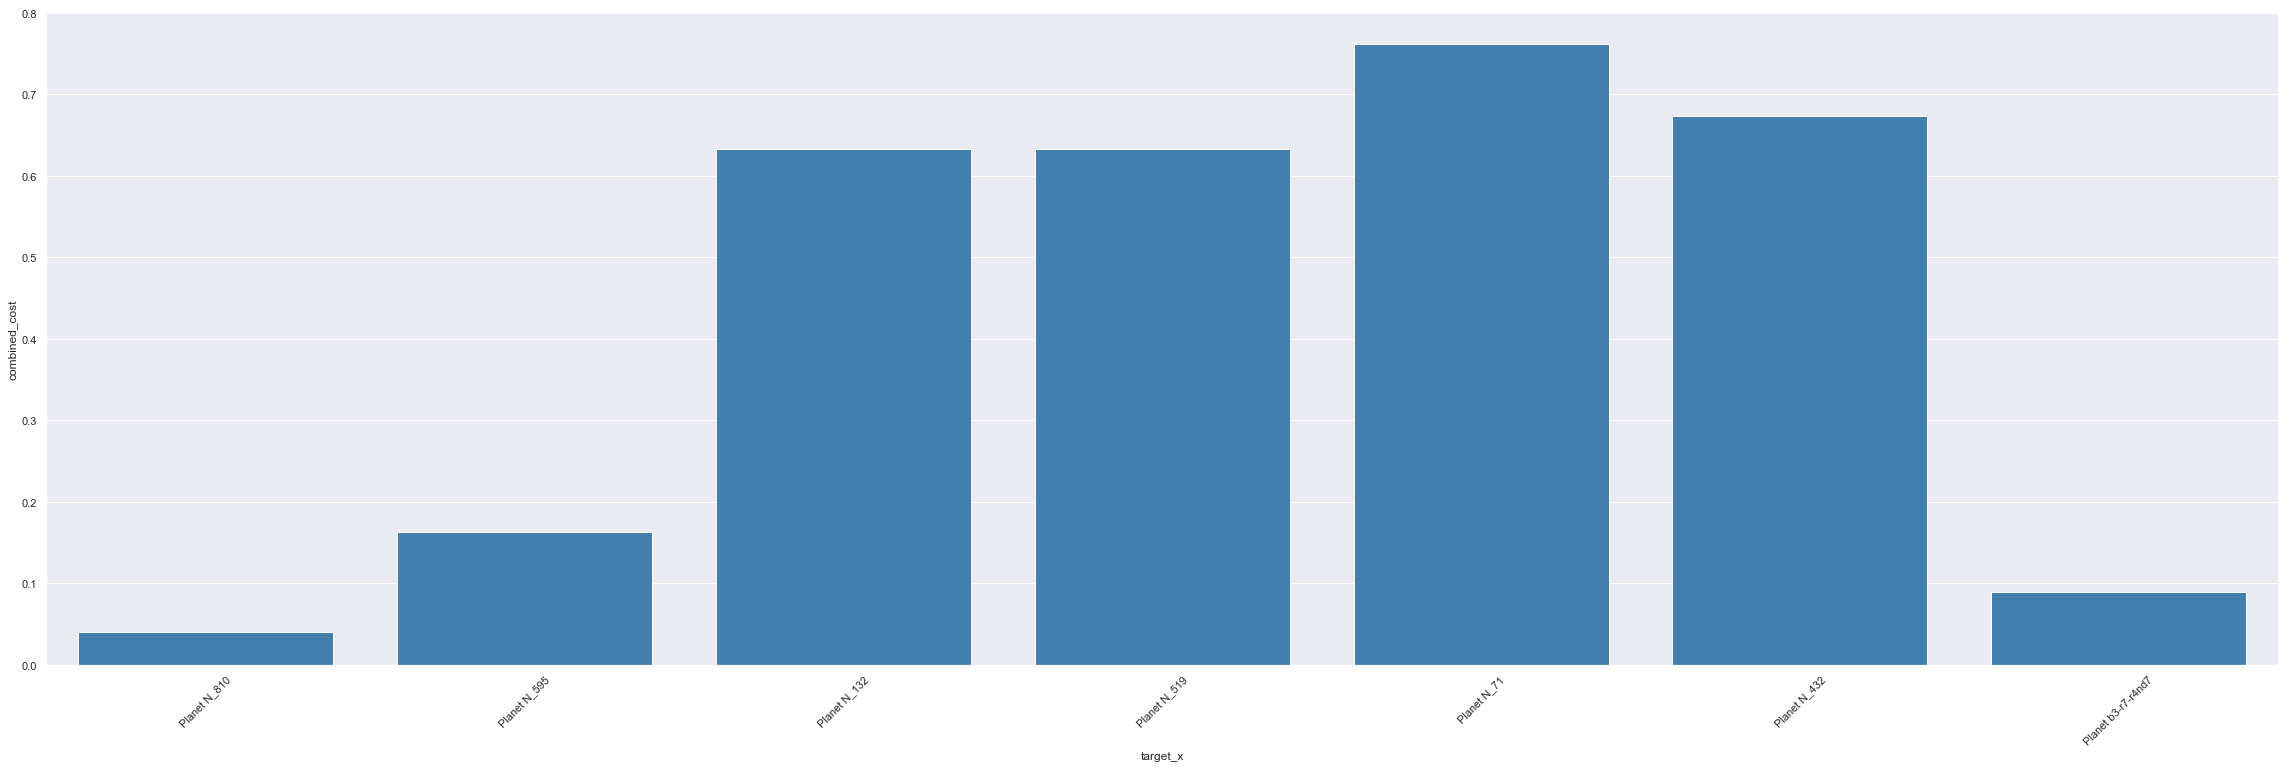

In [256]:
sns.set(font_scale = 1)
plt.figure(figsize=(40,12))
plt.xticks(rotation=45)
sns.barplot(x = 'target_x', y = 'combined_cost', data=way_to_b3_r7_r4nd7,  color = "#3182bd")
plt.savefig("Data/barchart.png") # save as png

There are 4 jumps which are larger than 0.5 feuel units. We have to be aware of this in order to plan ahead!

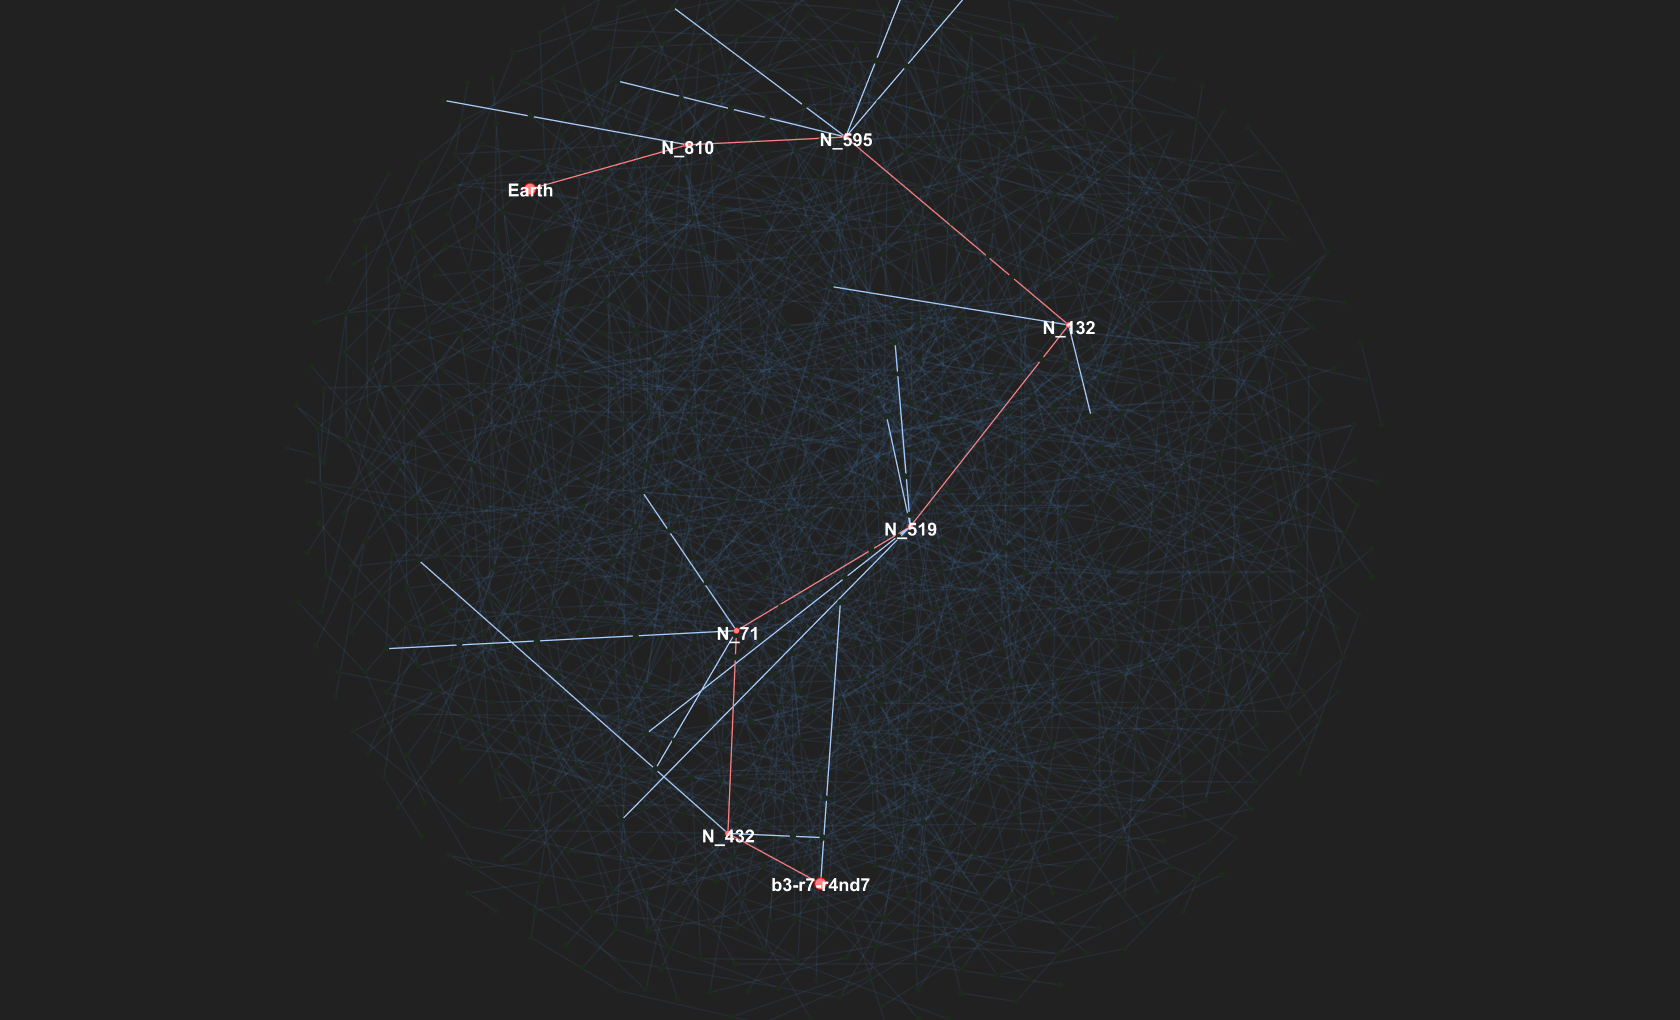

In [260]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='Data/network_gephi.png') 

I visualized our way in the program "Gephi" based on the export I did previously ("network.gexf"). The route is logged into the computer. Everything is ready for our journey.

# Engage!